## Convolutional Neural Network

### Mount Drive

In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

### Importing Packages

In [2]:
# Fetching Dataset
import pandas as pd

# Reading Images
import numpy as np
import cv2 as cv

# Scaling Features
# from sklearn.preprocessing import MinMaxScaler

# Spliting Train & Test Set
from sklearn.model_selection import train_test_split
# from fast_ml.model_development import train_valid_test_split

# Binarizing Output
from sklearn.preprocessing import LabelBinarizer

# Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating Model
import tensorflow as tf
from tensorflow.keras import layers,models

# Training and Evaluating the Model
from sklearn.metrics import (classification_report, multilabel_confusion_matrix, confusion_matrix)
import seaborn as sb
import matplotlib.pyplot as plt

# Making Predictions

# BD_DB_64


### Fetching Dataset

In [3]:
# dataset_dir = "/content/drive/MyDrive/Dataset/Dataset_Thesis/"
dataset_dir = "/kaggle/input/dataset-thesis/"
dataset = pd.read_csv(dataset_dir + "merged/merged.csv")

In [4]:
dataset

,Filename,District
0,0_16_1_0018_ (222).png,Bagerhat
1,0_14_1_0010_ (45).png,Bagerhat
2,0_14_1_0009_ (45).png,Bagerhat
3,0_16_1_0018_ (221).png,Bagerhat
4,0_16_1_0018_ (225).png,Bagerhat
...,...,...
11515,Thakurgaon_5 (2).jpg,Thakurgaon
11516,Thakurgaon_61.jpg,Thakurgaon
11517,Thakurgaon_19 (2).jpg,Thakurgaon
11518,Thakurgaon_60.jpg,Thakurgaon


In [5]:
X = dataset.iloc[:,0]
y = dataset.iloc[:,1]
print(X.shape)
print(y.shape)

(11520,)
(11520,)


### Reading Images

In [6]:
new_weight = 240
new_height = 80
x_data = np.empty((len(X), new_height, new_weight), dtype=np.int64)
x_data.shape

(11520, 80, 240)

In [7]:
# for i, img_path in enumerate(X):
#   # Reading Image
#   candidate_image = cv.imread(dataset_dir + "merged/raw/" + y[i] + "/" + img_path)
#   # Resizing Image
#   candidate_rs = cv.resize(candidate_image, dsize=(new_weight, new_height))
#   # Converting Image to Grayscale
#   candidate_gray = cv.cvtColor(candidate_rs, cv.COLOR_BGR2GRAY)
#   # Computing a Global Threshold Value from Grayscale Image(Using Otsu's Method) & Converting to Binary Image
#   ret, candidate_bw = cv.threshold(candidate_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
#   # ret, candidate_bw = cv.threshold(candidate_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
  
#   # print(img_path, end =" ")
#   x_data[i] = candidate_bw

In [8]:
for i, img_path in enumerate(X):
    candidate_image = cv.imread(dataset_dir + "merged/converted_80_240/" + y[i] + "/" + img_path, cv.IMREAD_UNCHANGED)
    # candidate_rs = cv.resize(candidate_image, dsize=(new_weight, new_height))
    x_data[i] = candidate_image

In [9]:
# plt.imshow(x_data[1], cmap="gray")
# len(x_data[0][0])

In [10]:
X = np.reshape(x_data,(X.shape[0],new_height*new_weight))
X.shape

(11520, 19200)

### Scaling Features

In [11]:
# sc = MinMaxScaler()
# X = sc.fit_transform(X)

In [12]:
# X

### Spliting Train & Test Set


In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45, stratify=dataset["District"])
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.75, random_state=45, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.60, stratify=y_rem)
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(8640, 19200) (1728, 19200) (1152, 19200) (8640,) (1728,) (1152,)


In [14]:
# print(
#     f'NUMBER OF TARGET IN THE ORIGINAL DATA\n{dataset["District"].value_counts()}\n\n'
#     + f"NUMBER OF TARGET IN THE TRAINING SET\n{y_train.value_counts()}\n\n"
#     + f"NUMBER OF TARGET IN THE TEST SET\n{y_test.value_counts()}\n\n"
#     + f"NUMBER OF TARGET IN THE VALIDATION SET\n{y_val.value_counts()}"
# )

In [15]:
# print(
#     f'RATIO OF TARGET IN THE ORIGINAL DATA\n{dataset["District"].value_counts() / len(dataset)}\n\n'
#     + f"RATIO OF TARGET IN THE TRAINING SET\n{y_train.value_counts() / len(y_train)}\n\n"
#     + f"RATIO OF TARGET IN THE TEST SET\n{y_test.value_counts() / len(y_test)}\n\n"
#     + f"RATIO OF TARGET IN THE VALIDATION SET\n{y_val.value_counts() / len(y_val)}"
# )

In [16]:
X_train = X_train.reshape(-1,new_height,new_weight,1)
X_test = X_test.reshape(-1,new_height,new_weight,1)
X_val = X_val.reshape(-1,new_height,new_weight,1)
print(X_train.shape, X_test.shape, X_val.shape)

(8640, 80, 240, 1) (1728, 80, 240, 1) (1152, 80, 240, 1)


### Binarizing Output

In [17]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_val = lb.fit_transform(y_val)
print(y_train.shape, y_test.shape, y_val.shape)

(8640, 64) (1728, 64) (1152, 64)


In [18]:
print(y_train)
print(y_test)
print(y_val)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
print(y_train.shape)
print(y_test.shape)

(8640, 64)
(1728, 64)


### Image Augmentation

In [20]:
# Define ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=8,
    zoom_range=0.1,
    shear_range=0.5,
    cval=0.0,
    fill_mode='constant')

In [21]:
# Generate augmented data
batch_size = 32
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=False)

In [22]:
len(train_generator)

270

### Creating Model


In [23]:
import datetime
from tensorflow.keras.callbacks import TensorBoard
log_dir = "logs/cnn_50/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [24]:
num_classes = dataset.District.nunique()
input_shape = (new_height, new_weight, 1)
# input_shape = X.shape

In [25]:
# Set hyperparameters
dropout_rate = 0.5

In [26]:
cnn_model = models.Sequential(name='CNN_AAA')
# cnn_model.add(layers.Input(shape=input_shape, name='Input'))
cnn_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, name='Conv2D_1'))
cnn_model.add(layers.AveragePooling2D((2, 2), name='AveragePooling2d_1'))
cnn_model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name='Conv2D_2'))
cnn_model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2d_1'))
cnn_model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', name='Conv2D_3'))
cnn_model.add(layers.AveragePooling2D((2, 2), name='AveragePooling2d_2'))
cnn_model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', name='Conv2D_4'))
cnn_model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2d_2'))
cnn_model.add(layers.Flatten(name='Flatten_1'))
cnn_model.add(layers.Dropout(rate=dropout_rate, name='Dropout_1'))
cnn_model.add(layers.Dense(units=num_classes, activation='softmax', name='Output'))

In [27]:
cnn_model.summary()

Model: "CNN_AAA"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 78, 238, 64)       640       
                                                                 
 AveragePooling2d_1 (Average  (None, 39, 119, 64)      0         
 Pooling2D)                                                      
                                                                 
 Conv2D_2 (Conv2D)           (None, 37, 117, 128)      73856     
                                                                 
 MaxPooling2d_1 (MaxPooling2  (None, 18, 58, 128)      0         
 D)                                                              
                                                                 
 Conv2D_3 (Conv2D)           (None, 16, 56, 256)       295168    
                                                                 
 AveragePooling2d_2 (Average  (None, 8, 28, 256)       0   

In [28]:
# !pip install visualkeras
# import visualkeras

In [29]:
# visualkeras.layered_view(cnn_model, legend=True, draw_volume=False)

In [30]:
# from tensorflow.keras.utils import plot_model
# plot_model(vit_model, to_file='cnn_model.png', show_shapes=True, show_layer_activations=True)

### Training & Evaluating the Model


In [31]:
epochs = 50
k = 5

In [32]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','top_k_categorical_accuracy'])

In [33]:
history  = cnn_model.fit(train_generator, validation_data=(X_val, y_val), epochs=epochs, callbacks=[tensorboard_callback])

Epoch 1/50
270/270 [==============================] - 21s 60ms/step - loss: 3.6663 - accuracy: 0.1843 - top_k_categorical_accuracy: 0.4546 - val_loss: 1.7404 - val_accuracy: 0.5304 - val_top_k_categorical_accuracy: 0.8438
Epoch 2/50
270/270 [==============================] - 17s 62ms/step - loss: 1.8025 - accuracy: 0.5066 - top_k_categorical_accuracy: 0.8175 - val_loss: 0.6698 - val_accuracy: 0.8177 - val_top_k_categorical_accuracy: 0.9644
Epoch 3/50
270/270 [==============================] - 16s 58ms/step - loss: 1.1253 - accuracy: 0.6794 - top_k_categorical_accuracy: 0.9141 - val_loss: 0.4340 - val_accuracy: 0.8828 - val_top_k_categorical_accuracy: 0.9766
Epoch 4/50
270/270 [==============================] - 16s 59ms/step - loss: 0.7888 - accuracy: 0.7821 - top_k_categorical_accuracy: 0.9458 - val_loss: 0.2832 - val_accuracy: 0.9323 - val_top_k_categorical_accuracy: 0.9852
Epoch 5/50
270/270 [==============================] - 15s 57ms/step - loss: 0.6204 - accuracy: 0.8280 - top_k_ca

In [34]:
history_test = cnn_model.evaluate(X_test, y_test, callbacks=[tensorboard_callback])

54/54 [==============================] - 1s 9ms/step - loss: 0.0872 - accuracy: 0.9861 - top_k_categorical_accuracy: 0.9959


In [35]:
y_predicted = cnn_model.predict(X_test)

54/54 [==============================] - 1s 8ms/step


In [36]:
y_test_label = lb.inverse_transform(y_test)
y_predicted_label = lb.inverse_transform(y_predicted)

In [37]:
# print("Classification Report:")
# clr = classification_report(y_test_label, y_predicted_label)
# print(clr)

In [38]:
# print("Confusion Matrix:")
# multilabel_cm = multilabel_confusion_matrix(y_test_label, y_predicted_label)
# cm = confusion_matrix(y_test_label, y_predicted_label)
# print(cm)

In [39]:
# cm_df = pd.DataFrame(cm, index = dataset.District.unique(), columns = dataset.District.unique())
# plt.figure(figsize=(20,20))
# cm_plot = sb.heatmap(cm_df, cmap="YlGnBu", annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actual Class')
# plt.xlabel('Predicted Class')
# plt.show(cm_plot)

In [40]:
# !zip -r logs.zip logs/

## Making Predictions


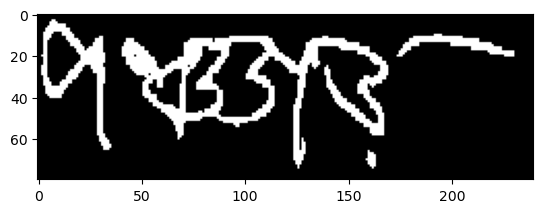

In [61]:
test = 45
top = 5
plt.imshow(X_test[test],cmap = "gray")

In [62]:
# print(y_predicted[test])
y_predicted_labels = y_predicted[test].argsort()[-top:][::-1]
y_predicted_labels_accuracy = y_predicted[test][y_predicted_labels]
print(y_predicted_labels, y_predicted_labels_accuracy)

[49 55  5 52 33] [9.9992716e-01 6.8402405e-05 4.2658971e-06 9.1620691e-08 6.5521295e-09]


In [63]:
print("Top K=>")
for i in range(top):
    print("Label: ", lb.classes_[y_predicted_labels[i]], ", Accuracy: ", y_predicted_labels_accuracy[i]*100)
print("Predicted=>")
y_predicted_labels = np.argmax(y_predicted[test])
print(lb.classes_[y_predicted_labels], end =" ")

Top K=>
Label:  Panchagarh , Accuracy:  99.99271631240845
Label:  Rangpur , Accuracy:  0.0068402405304368585
Label:  Bogura , Accuracy:  0.0004265897132427199
Label:  Rajbari , Accuracy:  9.162069147805596e-06
Label:  Magura , Accuracy:  6.552129505621451e-07
Predicted=>
Panchagarh 

## BD_DB_64

In [64]:
# dataset_new = pd.read_csv(dataset_dir + "BD_DB_64/BD_DB_64.csv")
# X_new = dataset_new.iloc[:,0]
# y_new = dataset_new.iloc[:,1]
# x_data_new = np.empty((len(X_new), new_height, new_weight), dtype=np.int64)

In [65]:
# for i, img_path in enumerate(X_new):
#     candidate_image_new = cv.imread(dataset_dir + "BD_DB_64/converted_80_240/" + y_new[i] + "/" + img_path, cv.IMREAD_UNCHANGED)
#     # candidate_rs = cv.resize(candidate_image, dsize=(new_weight, new_height))
#     x_data_new[i] = candidate_image_new
# X_new = np.reshape(x_data_new,(X_new.shape[0],new_height*new_weight))
# X_new = X_new.reshape(-1,new_height,new_weight,1)
# y_new = lb.fit_transform(y_new)

In [66]:
# history_test = cnn_model.evaluate(X_new, y_new)

## Explainibility

In [67]:
# !pip install shap lime

In [68]:
import lime
from lime import lime_image
# from lime.wrappers.scikit_image import SegmentationAlgorithm
import skimage
from skimage.color import gray2rgb, rgb2gray
from skimage.segmentation import mark_boundaries

In [69]:
# test = 3
# demo_image = X_test[test]
# input_image = gray2rgb(demo_image.squeeze())
# # input_image = demo_image
# plt.imshow(input_image,cmap = "gray")

In [70]:
# y_predicted_labels = y_predicted[test].argsort()[-top:][::-1]
# y_predicted_labels_accuracy = y_predicted[test][y_predicted_labels]
# for i in range(top):
#     print("Label: ", lb.classes_[y_predicted_labels[i]], ", Accuracy: ", y_predicted_labels_accuracy[i]*100)

In [71]:
explainer = lime_image.LimeImageExplainer()
def predict_fn(image):
    model_image = rgb2gray(image).reshape(-1,80,240,1)
    preds = cnn_model.predict(model_image)
    return preds

In [72]:
# # %%time
# # Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
# explanation = explainer.explain_instance(input_image.astype('double'), predict_fn, top_labels=5, num_samples=500, num_features=19200, hide_color=0, progress_bar=False)

In [73]:
# # Select the same class explained on the figures above.
# ind =  explanation.top_labels[0]
# # Map each explanation weight to the corresponding superpixel
# dict_heatmap = dict(explanation.local_exp[ind])
# heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
# # Plot. The visualization makes more sense if a symmetrical colorbar is used.
# plt.imshow(heatmap, cmap = 'YlGn', vmin  = -heatmap.max(), vmax = heatmap.max())
# plt.colorbar()

In [88]:
for i in range(y_test.shape[0]):
    if(y_test_label[i] != y_predicted_label[i]):
        print(str(i) + ":" + y_test_label[i] + "=>" + y_predicted_label[i], end = " ")

67:Madaripur=>Faridpur 93:Noakhali=>Kishoreganj 114:Shariatpur=>Faridpur 143:Bagerhat=>Narail 287:Rangpur=>Tangail 384:Moulvibazar=>Manikganj 403:Jamalpur=>Jhenaidah 484:Dinajpur=>Pirojpur 595:Meherpur=>Sherpur 673:Meherpur=>Sherpur 724:Rangpur=>Tangail 930:Patuakhali=>Kishoreganj 935:Jashore=>Bhola 1008:Chandpur=>Tangail 1106:Bhola=>Barguna 1177:Panchagarh=>Jhalokati 1258:Shariatpur=>Faridpur 1315:Bogura=>Tangail 1401:Noakhali=>Narsingdi 1404:Chittagong=>Tangail 1447:Barishal=>Bandarban 1697:Dinajpur=>Pirojpur 1713:Munshiganj=>Manikganj 1725:Meherpur=>Tangail 

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


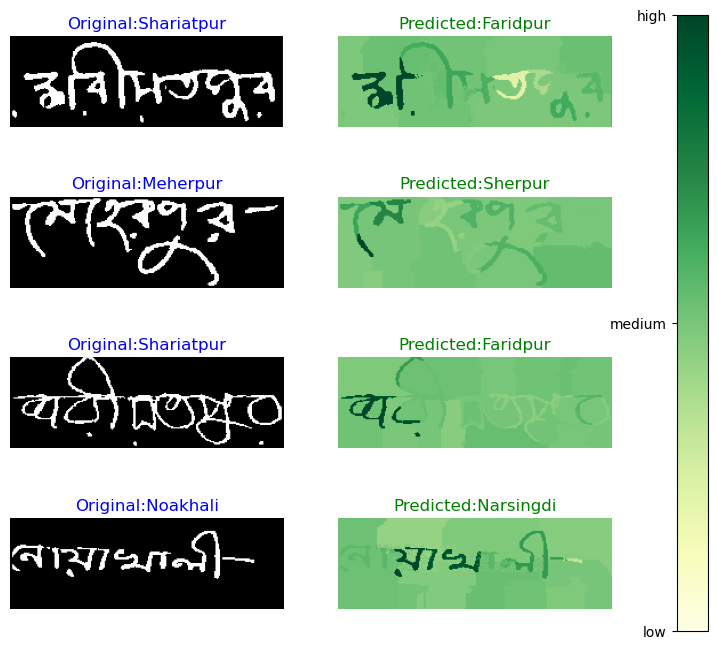

In [93]:
words = [114, 595, 1258, 1401]
nrows = len(words)
ncolumns = 3
word_no = 0
plt.figure(figsize = (ncolumns * 4, nrows * 2))
plt.subplot(1, ncolumns, 3)
a = np.array([[0,1]])
plt.imshow(a, cmap = 'YlGn')
plt.gca().set_visible(False)
bar = plt.colorbar(location='left')
bar.set_ticks(np.arange(0, 1.1, 0.5))
bar.set_ticklabels(['low', 'medium', 'high'])
for i in words:
    demo_image = X_test[i]
    input_image = gray2rgb(demo_image.squeeze())
    # Input
    word_no += 1
    plt.subplot(nrows, ncolumns, word_no)
    plt.imshow(demo_image, cmap = 'gray')
    plt.axis('off')
    plt.title("Original:" + y_test_label[i], color='blue')
    # Output
    explanation = explainer.explain_instance(input_image.astype('double'), predict_fn, top_labels=5, num_samples=500, num_features=19200, hide_color=0)    
    dict_heatmap = dict(explanation.local_exp[explanation.top_labels[0]])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
    word_no += 1
    plt.subplot(nrows, ncolumns, word_no)
    plt.imshow(heatmap, cmap = 'YlGn', vmin  = -heatmap.max(), vmax = heatmap.max())
    # plt.colorbar(location='right')
    plt.axis('off')
    plt.title("Predicted:" + y_predicted_label[i], color='green')
    word_no += 1
    # plt.subplot(nrows, ncolumns, word_no)
    # plt.imshow(heatmap, cmap = 'YlGn', vmin  = -heatmap.max(), vmax = heatmap.max())
    # plt.gca().set_visible(False)
    # plt.colorbar(location='left')


In [94]:
for i in range(y_test.shape[0]):
    if(y_test_label[i] == y_predicted_label[i]):
        print(str(i) + ":" + y_test_label[i] + "=>" + y_predicted_label[i], end = " ")

0:Kushtia=>Kushtia 1:Narail=>Narail 2:Feni=>Feni 3:Feni=>Feni 4:Sirajganj=>Sirajganj 5:Rangamati=>Rangamati 6:Lalmonirhat=>Lalmonirhat 7:Dhaka=>Dhaka 8:Kushtia=>Kushtia 9:Feni=>Feni 10:Sirajganj=>Sirajganj 11:Mymensingh=>Mymensingh 12:Gopalganj=>Gopalganj 13:Shariatpur=>Shariatpur 14:Gopalganj=>Gopalganj 15:Kishoreganj=>Kishoreganj 16:Narayanganj=>Narayanganj 17:Bhola=>Bhola 18:Mymensingh=>Mymensingh 19:Thakurgaon=>Thakurgaon 20:Gaibandha=>Gaibandha 21:Madaripur=>Madaripur 22:Naogaon=>Naogaon 23:Jhalokati=>Jhalokati 24:Narayanganj=>Narayanganj 25:Narayanganj=>Narayanganj 26:Mymensingh=>Mymensingh 27:Kushtia=>Kushtia 28:Nawabganj=>Nawabganj 29:Kushtia=>Kushtia 30:Satkhira=>Satkhira 31:Rangpur=>Rangpur 32:Gopalganj=>Gopalganj 33:Lakshmipur=>Lakshmipur 34:Rangamati=>Rangamati 35:Nilphamari=>Nilphamari 36:Bandarban=>Bandarban 37:Kishoreganj=>Kishoreganj 38:Munshiganj=>Munshiganj 39:Kurigram=>Kurigram 40:Nawabganj=>Nawabganj 41:Bandarban=>Bandarban 42:Sylhet=>Sylhet 43:Shariatpur=>Shariatpu

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


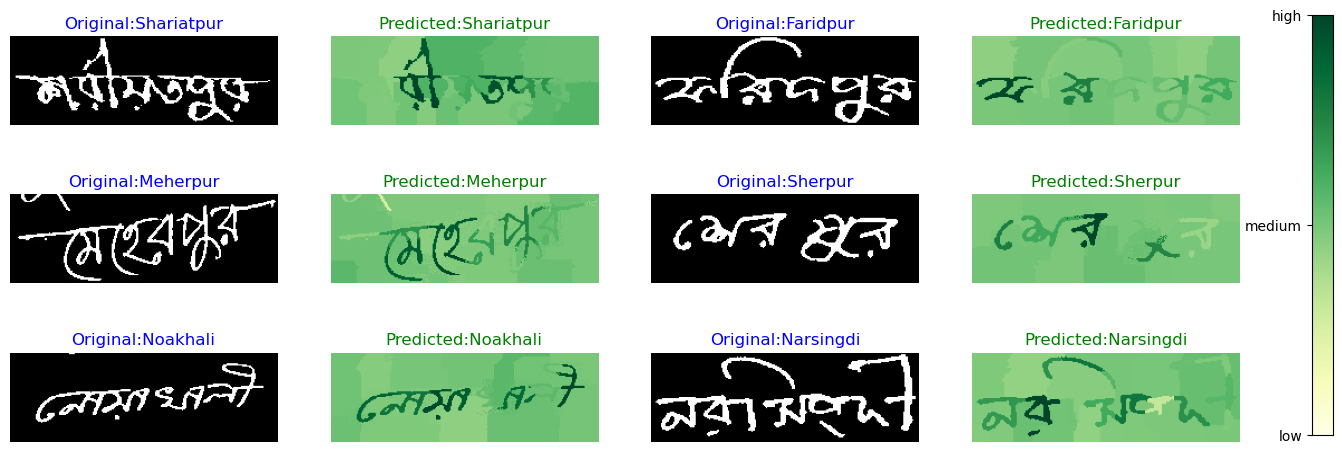

In [139]:
words = [105, 205, 206, 51, 376, 112]
nrows = len(words)
ncolumns = 5
word_no = 0
plt.figure(figsize = (ncolumns * 4, nrows * 2))
plt.subplot(2, ncolumns, 5)
a = np.array([[0,1]])
plt.imshow(a, cmap = 'YlGn')
plt.gca().set_visible(False)
bar = plt.colorbar(location='left')
bar.set_ticks(np.arange(0, 1.1, 0.5))
bar.set_ticklabels(['low', 'medium', 'high'])
for i in words:
    demo_image = X_test[i]
    input_image = gray2rgb(demo_image.squeeze())
    # Input
    if (word_no % 5 == 0):
        word_no += 1
    plt.subplot(nrows, ncolumns, word_no)
    plt.imshow(demo_image, cmap = 'gray')
    plt.axis('off')
    plt.title("Original:" + y_test_label[i], color='blue')
    # Output
    explanation = explainer.explain_instance(input_image.astype('double'), predict_fn, top_labels=5, num_samples=500, num_features=19200, hide_color=0)    
    dict_heatmap = dict(explanation.local_exp[explanation.top_labels[0]])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
    word_no += 1
    plt.subplot(nrows, ncolumns, word_no)
    plt.imshow(heatmap, cmap = 'YlGn', vmin  = -heatmap.max(), vmax = heatmap.max())
    # plt.colorbar(location='right')
    plt.axis('off')
    plt.title("Predicted:" + y_predicted_label[i], color='green')
    word_no += 1
    # plt.subplot(nrows, ncolumns, word_no)
    # plt.imshow(heatmap, cmap = 'YlGn', vmin  = -heatmap.max(), vmax = heatmap.max())
    # plt.gca().set_visible(False)
    # plt.colorbar(location='left')


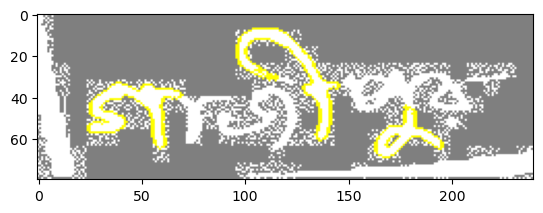

In [77]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, negative_only=False, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

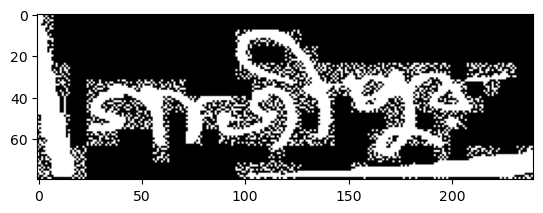

In [78]:
plt.imshow(temp)

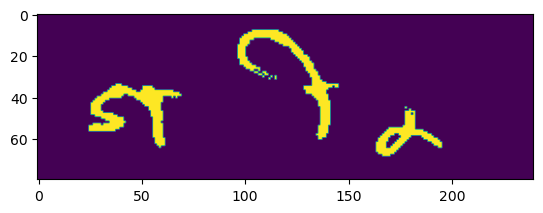

In [79]:
plt.imshow(mask)